In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
# Algorithm used to build the model

from sklearn.model_selection import train_test_split   # to perfom train test split
from sklearn.linear_model import LogisticRegression     
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
# Model Evaluation

from sklearn.metrics import confusion_matrix,classification_report

# For scaling my data  -- 
from sklearn.preprocessing import StandardScaler

### Loading the dataset

In [4]:
df = pd.read_csv(r"C:\Users\DELL\Documents\Python Imarticus\Hotel Reservations.csv")

In [5]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Target Variable : Booking Status

### Data Overview

In [6]:
df.shape

(36275, 19)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [8]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

# EDA

In [9]:
df[df.duplicated()]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### There are no duplicate values.

### There are no null values either. So we can go ahead with feature engineering

In [10]:
for i in df.columns:
    print(i,'-->',df[i].nunique())
    print(df[i].unique())

Booking_ID --> 36275
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
no_of_adults --> 5
[2 1 3 0 4]
no_of_children --> 6
[ 0  2  1  3 10  9]
no_of_weekend_nights --> 8
[1 2 0 4 3 6 5 7]
no_of_week_nights --> 18
[ 2  3  1  4  5  0 10  6 11  7 15  9 13  8 14 12 17 16]
type_of_meal_plan --> 4
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
required_car_parking_space --> 2
[0 1]
room_type_reserved --> 7
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
lead_time --> 352
[224   5   1 211  48 346  34  83 121  44   0  35  30  95  47 256  99  12
 122   2  37 130  60  56   3 107  72  23 289 247 186  64  96  41  55 146
  32  57   7 124 169   6  51  13 100 139 117  39  86  19 192 179  26  74
 143 177  18 267 155  46 128  20  40 196 188  17 110  68  73  92 171 134
 320 118 189  16  24   8  10 182 116 123 105 443 317 286 148  14  85  25
  28  80  11 162  82  27 245 266 112  88  69 273   4  97  31  62 197 280
 185 

In [11]:
df[(df['no_of_adults']==0) & (df['no_of_children']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### So there are no columns where both no of adults and no of children are zero. If there was an entry like that we will have to drop it.

In [12]:
df[(df['no_of_adults']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
287,INN00288,0,2,2,2,Meal Plan 1,0,Room_Type 1,68,2018,4,24,Online,0,0,0,108.38,1,Canceled
653,INN00654,0,2,1,2,Meal Plan 1,0,Room_Type 2,78,2018,8,19,Online,0,0,0,115.68,1,Not_Canceled
937,INN00938,0,2,0,3,Meal Plan 1,0,Room_Type 2,40,2018,1,14,Online,0,0,0,6.67,1,Not_Canceled
954,INN00955,0,2,1,1,Meal Plan 1,0,Room_Type 2,92,2018,10,29,Online,0,0,0,81.50,2,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34720,INN34721,0,2,0,3,Meal Plan 1,0,Room_Type 2,76,2018,9,21,Online,0,0,0,127.38,3,Not_Canceled
34730,INN34731,0,2,1,1,Meal Plan 1,0,Room_Type 2,178,2018,8,27,Online,0,0,0,88.77,0,Canceled
34890,INN34891,0,2,2,2,Meal Plan 1,0,Room_Type 2,31,2018,9,16,Online,0,0,0,124.25,2,Not_Canceled
35691,INN35692,0,2,2,1,Meal Plan 1,0,Room_Type 2,75,2018,3,19,Online,0,0,0,78.00,0,Canceled


### We can see that there are records where no of adults=0 and no of children are having values of 1,2etc. But this cannot be possible since childrens won't be allowed to stay without parents

### So I'm going to swap the columns of adults and children where the number of adults is 0, I will be swapping them with the corresponding values of number of children column since I believe there must be an error while entering the values by the respective person

In [13]:
#defining a condition
condition = df['no_of_adults'] ==0

#We create a temporary variable temp to hold the values of column 'no_of_adults' where the condition is True.
#Next, we swap the values of column 'no_of_adults' and column 'no_of_children' where the condition is True. 
#Finally, we assign the values from temp back to column 'no_of_children'.

temp = df.loc[condition, 'no_of_adults'].copy()
df.loc[condition, 'no_of_adults'] = df.loc[condition, 'no_of_children']
df.loc[condition, 'no_of_children'] = temp

In [14]:
df[(df['no_of_adults']==0)]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


### We won't be using Unique ID column also hence dropping it

In [15]:
df.drop('Booking_ID',axis=1,inplace=True)

### Our EDA process is done now

# Data Visualization

<AxesSubplot:xlabel='booking_status', ylabel='count'>

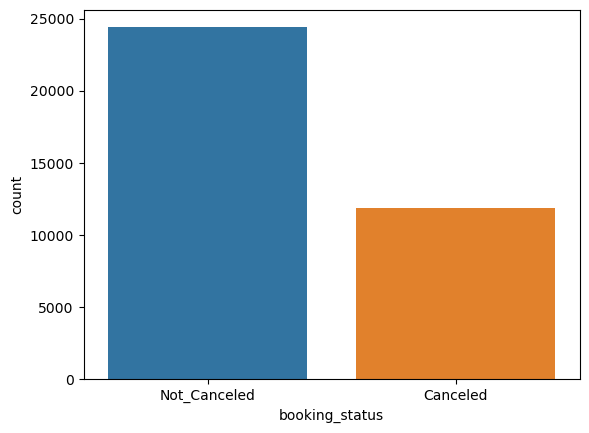

In [16]:
sns.countplot(df.booking_status)

In [17]:
df.booking_status.value_counts(normalize=True)

Not_Canceled    0.672364
Canceled        0.327636
Name: booking_status, dtype: float64

### Target variable has 67% Not Calceled values and 33% Canceled values.

<AxesSubplot:xlabel='no_of_adults', ylabel='count'>

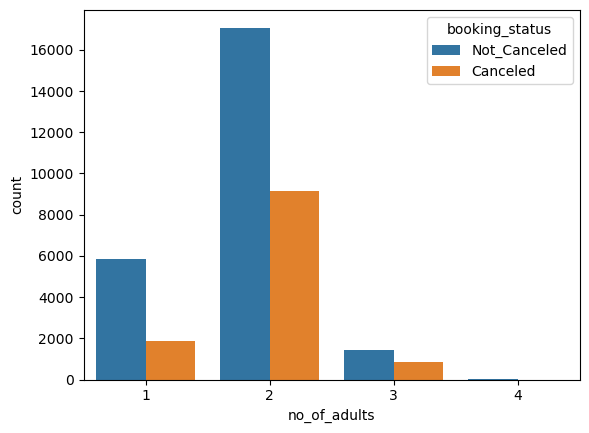

In [18]:
sns.countplot(df.no_of_adults,hue=df.booking_status)

In [19]:
df.groupby('no_of_adults')['booking_status'].value_counts(normalize=True)

no_of_adults  booking_status
1             Not_Canceled      0.758836
              Canceled          0.241164
2             Not_Canceled      0.650814
              Canceled          0.349186
3             Not_Canceled      0.628338
              Canceled          0.371662
4             Not_Canceled      0.812500
              Canceled          0.187500
Name: booking_status, dtype: float64

<AxesSubplot:xlabel='no_of_children', ylabel='count'>

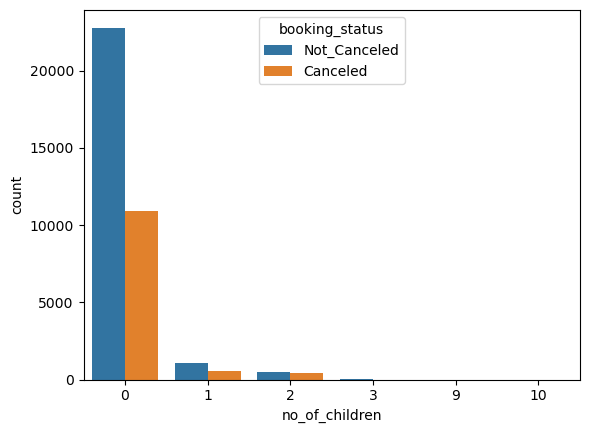

In [20]:
sns.countplot(df.no_of_children,hue=df.booking_status)

In [21]:
df.groupby('no_of_children')['booking_status'].value_counts(normalize=True)

no_of_children  booking_status
0               Not_Canceled      0.675940
                Canceled          0.324060
1               Not_Canceled      0.666048
                Canceled          0.333952
2               Not_Canceled      0.553514
                Canceled          0.446486
3               Not_Canceled      0.642857
                Canceled          0.357143
9               Canceled          0.500000
                Not_Canceled      0.500000
10              Not_Canceled      1.000000
Name: booking_status, dtype: float64

### We can see that the hotel is mostly attracting young couples. So the hotel can create curated experiences for couples and can improve their customer experience since we can see that mostly couples with no kids cancel the most also. Also the hotel can look into the couples who cancelled and get their feedback on why they cancelled as the hotel might want to work on the shortcomings if it's related to pricing, experiences or even the rooms as this can help to drive up the profits 

In [22]:
df.dtypes

no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

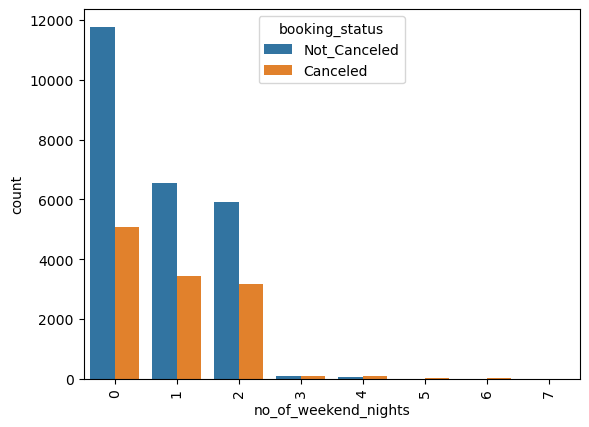

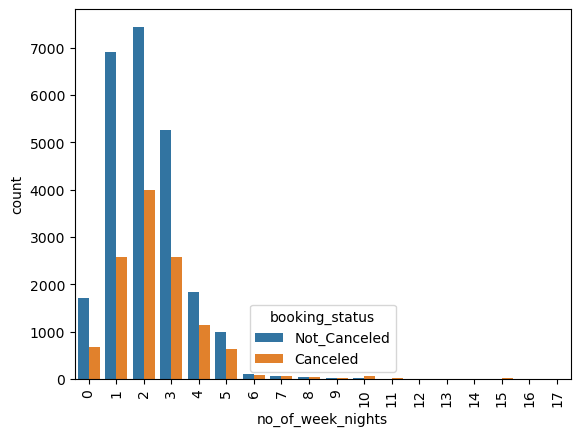

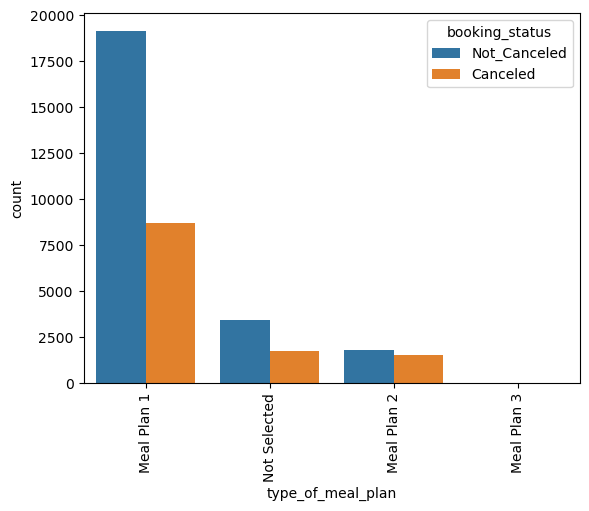

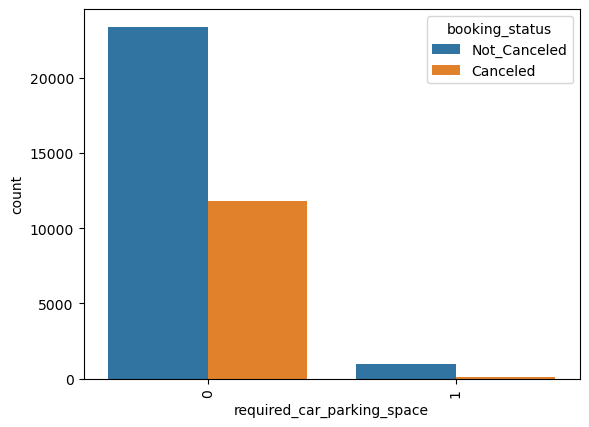

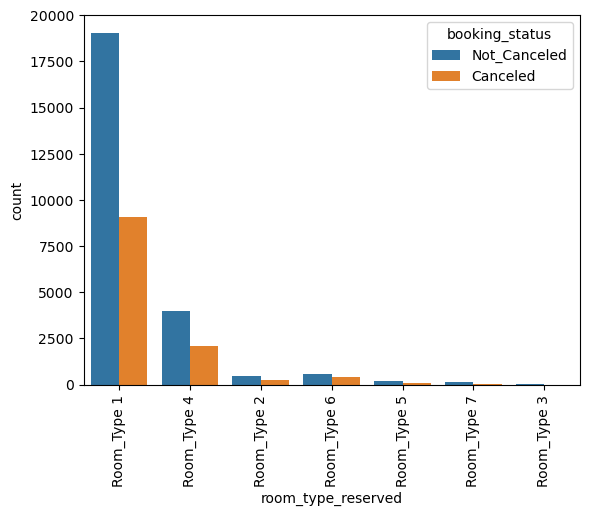

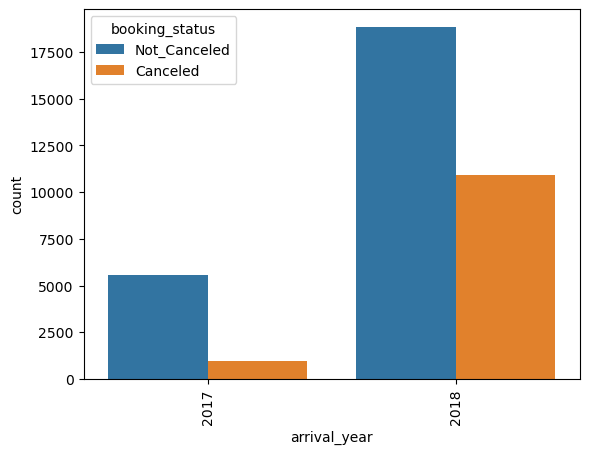

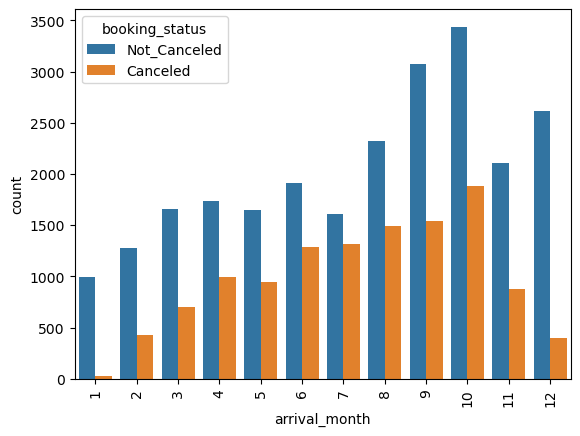

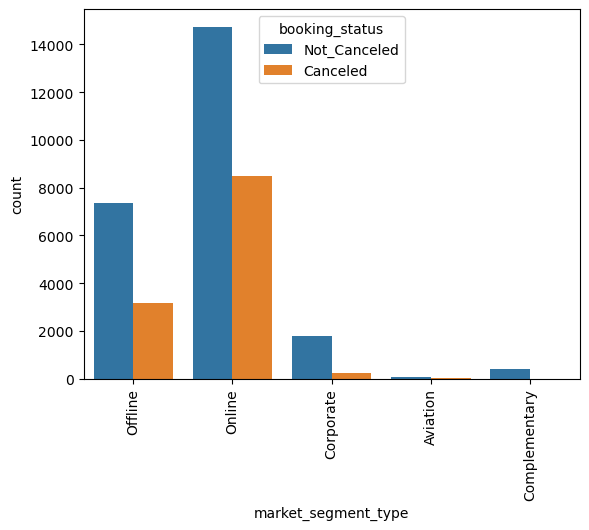

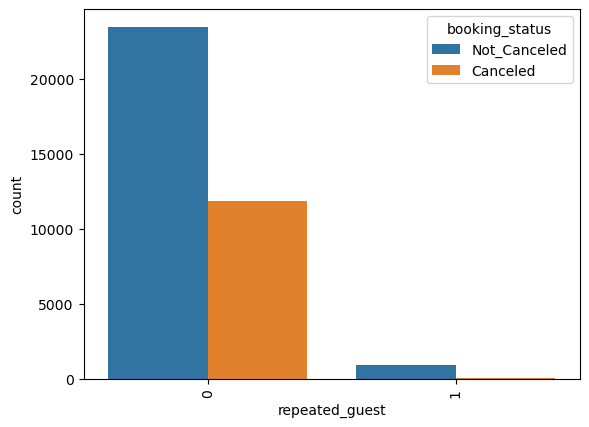

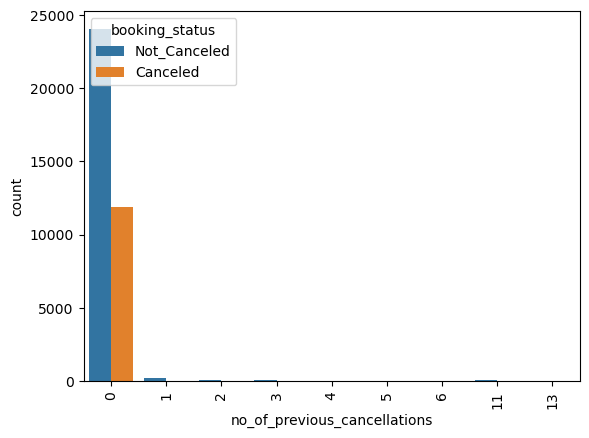

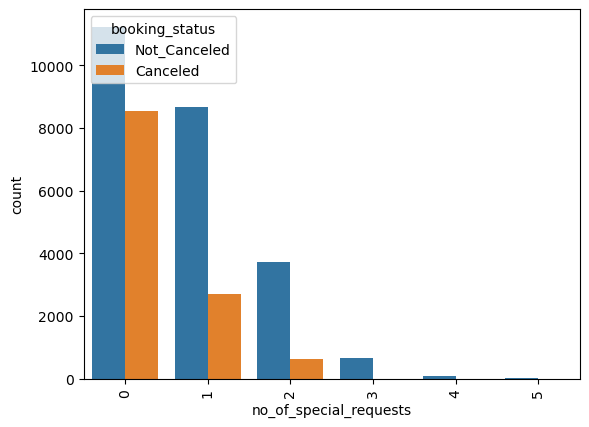

In [23]:
cat_features = df[['no_of_weekend_nights','no_of_week_nights','type_of_meal_plan','required_car_parking_space','room_type_reserved','arrival_year','arrival_month','market_segment_type','repeated_guest','no_of_previous_cancellations','no_of_special_requests']]
for i in cat_features.columns:
        sns.countplot(cat_features[i],hue=df.booking_status)
        plt.xticks(rotation = 90)
        plt.show()

Inferences from the visualization:
1. People come mostly for weekday stay than for weekend. So it'll be busy in the weekdays than in weekends.
2. Type of meal plan 1 was most preferred by the customers. So the hotel can take feedbacks on the meal plan and work on improving customer satisfaction as it'll create better reputation for the hotel. Also the cancellation percentage was higher when they had selected meal plan 2.
3. Most people doesn't require car parking space and of those who require car parking space, the cancellation rate is very low.
4. Room Type 1 and Room Type 4 are mostly preferred with Room Type 1 being the highest.
5. The peak season begins from july and there is steep increase in demand till october followed by a fall in demand in november and a small increase in december.
6. We can see that in July the cancellation rate was very high. So the hotel might want to check into it. Also they must at all cost try to reduce the cancellation as much as possible during this peak season.
7. The cancellation rates are really low in the month of Dec and Jan.
8. People prefer booking online. But the cancellation rate of people booking online is higher than offline
9. Also in corporate bookings there's least amount of cancellation.
10. Since data in 2018 is more, the number of repeated guests is really small. But amoung the repeated guests the cancellation rate is really low.
11. Number of people having no special requests are more but the cancellation rate of that category is huge. Whereas people who make special requests has very less chance to cancel their reservation.  


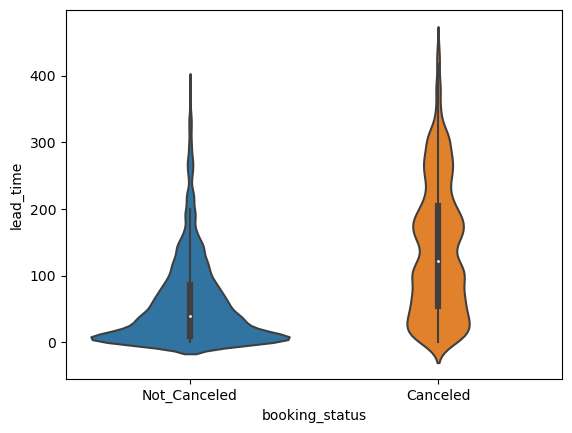

In [24]:
sns.violinplot(x='booking_status', y='lead_time', data=df)
plt.show()

### We can see that people with very less lead time tend to not cancel their reservations, whereas as the lead time increases chances of cancellation increases

### Let me covert target variable to binary variables

In [25]:
data = df.copy()

In [26]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [27]:
data['booking_status'] = data['booking_status'].replace({'Canceled':1,'Not_Canceled':0})

### Applying OHE on independent features

In [28]:
data = pd.get_dummies(data,drop_first=True)

In [29]:
pd.set_option('display.max_columns', None)

In [30]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1


### Seperating dependent and Independent variable

In [93]:
X = data.drop('booking_status',axis=1)
y = pd.DataFrame(data.booking_status,columns=['booking_status'])

In [49]:
print(f'Independent Features shape = {X.shape}, Dependent Features Shape = {y.shape}')

Independent Features shape = (36275, 27), Dependent Features Shape = (36275, 1)


### Performing Train-Test-Split

In [326]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

### Logistic Regression

In [52]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86     17046
           1       0.74      0.63      0.68      8346

    accuracy                           0.81     25392
   macro avg       0.79      0.76      0.77     25392
weighted avg       0.80      0.81      0.80     25392

[[15191  1855]
 [ 3058  5288]]


### Decision Tree

In [53]:
DT=DecisionTreeClassifier()
DT.fit(X_train,y_train)
y_train_pred = DT.predict(X_train)
y_test_pred = DT.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17046
           1       1.00      0.99      0.99      8346

    accuracy                           0.99     25392
   macro avg       1.00      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

[[17025    21]
 [  112  8234]]


In [54]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7344
           1       0.80      0.80      0.80      3539

    accuracy                           0.87     10883
   macro avg       0.85      0.85      0.85     10883
weighted avg       0.87      0.87      0.87     10883

[[6618  726]
 [ 705 2834]]


### Random Forest

In [55]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17046
           1       0.99      0.99      0.99      8346

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

[[16998    48]
 [   85  8261]]


In [56]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7344
           1       0.87      0.81      0.84      3539

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883

[[6928  416]
 [ 681 2858]]


### My random forest model is giving me the highest accuracy for test data hence let me perform hyperparameter tuning for random forest model

In [57]:
## Establishing some parameters
parameters = {'n_estimators':[100,200,300],
              'max_features':['log2', 'sqrt'],
              'max_depth':[3,4,5,6,7],
              'min_samples_split':[2,6,8,10,14],
              'min_samples_leaf':[1,2,3,4,5],
              'criterion':['gini', 'entropy', 'log_loss']
              }

In [58]:
from sklearn.model_selection import RandomizedSearchCV

RF_model = RandomizedSearchCV(estimator = RF,param_distributions = parameters,cv=5,random_state = 0)

In [59]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 6, 8, 10, 14],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0)

In [60]:
# best Parameter
RF_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [65]:
RF=RandomForestClassifier(n_estimators= 100,min_samples_split= 2,min_samples_leaf= 3,max_features= 'sqrt',max_depth= 7,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.90     17046
           1       0.87      0.64      0.74      8346

    accuracy                           0.85     25392
   macro avg       0.86      0.80      0.82     25392
weighted avg       0.85      0.85      0.84     25392

[[16275   771]
 [ 3025  5321]]


In [66]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7344
           1       0.86      0.63      0.73      3539

    accuracy                           0.85     10883
   macro avg       0.85      0.79      0.81     10883
weighted avg       0.85      0.85      0.84     10883

[[6975  369]
 [1307 2232]]


### Hence I've gotten 85% accuracy for my training and test data and it has also overcome overfitting.

### Let me select best features and train my model once again to see if my accuracy increases even more

## Type of Feature Selection Method 

### 1. Filter Methods

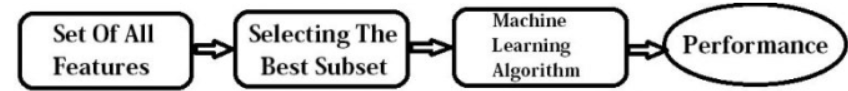

The Features are measured via univariate statistics instead of cross validation
This method is faster and less computational expensive than wrapper method

**a. Information Gain:**
    Information gain calculates the reduction in entropy from the transformation of a dataset. It can be used for feature selection by evaluating the Information gain of each variable in the context of the target variable.

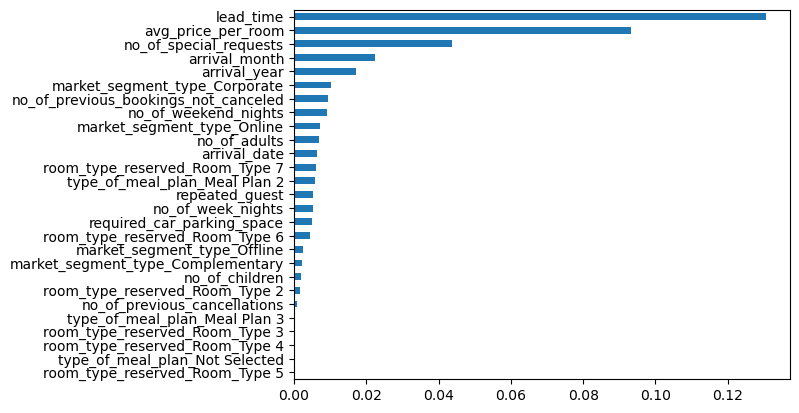

In [67]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

importances = mutual_info_classif(X,y)
feat_importances = pd.Series(importances,X.columns)
sorted_importances = feat_importances.sort_values()
sorted_importances.plot(kind='barh')
plt.show()

In [105]:
sorted_importances[-10:].sort_values(ascending=False).index

Index(['lead_time', 'avg_price_per_room', 'no_of_special_requests',
       'arrival_month', 'arrival_year', 'market_segment_type_Corporate',
       'no_of_previous_bookings_not_canceled', 'no_of_weekend_nights',
       'market_segment_type_Online', 'no_of_adults'],
      dtype='object')

In [118]:
X = data[sorted_importances[-10:].sort_values(ascending=False).index]

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [124]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 6, 8, 10, 14],
                                        'n_estimators': [100, 200, 300]},
                   random_state=0)

In [125]:
# best Parameter
RF_model.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 3,
 'max_features': 'sqrt',
 'max_depth': 7,
 'criterion': 'gini'}

In [120]:
RF=RandomForestClassifier(n_estimators= 100,min_samples_split= 2,min_samples_leaf= 3,max_features= 'sqrt',max_depth= 7,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     17046
           1       0.85      0.69      0.76      8346

    accuracy                           0.86     25392
   macro avg       0.86      0.82      0.83     25392
weighted avg       0.86      0.86      0.86     25392

[[16040  1006]
 [ 2562  5784]]


In [121]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      7344
           1       0.84      0.68      0.75      3539

    accuracy                           0.85     10883
   macro avg       0.85      0.81      0.82     10883
weighted avg       0.85      0.85      0.85     10883

[[6876  468]
 [1133 2406]]


## b.Chi-square Test

The Chi-square test is used for categorical features in a dataset. We calculate Chi-square between each feature and the target and select the desired number of features with the best Chi-square scores. In order to correctly apply the chi-squared to test the relation between various features in the dataset and the target variable, the following conditions have to be met: the variables have to be categorical, sampled independently and features must be non negative values

In [295]:
from sklearn.feature_selection import SelectKBest, chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)

fit = bestfeatures.fit(X,y)

dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores



,Specs,Score
0,no_of_adults,39.345599
1,no_of_children,68.574177
2,no_of_weekend_nights,128.539472
3,no_of_week_nights,283.301404
4,required_car_parking_space,261.098182
5,lead_time,604368.906381
6,arrival_year,0.085364
7,arrival_month,5.810592
8,arrival_date,20.072918
9,repeated_guest,406.835877


In [296]:
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                                   Specs          Score
5                              lead_time  604368.906381
12                    avg_price_per_room    8777.701483
11  no_of_previous_bookings_not_canceled    2634.980493
13                no_of_special_requests    2317.563293
24         market_segment_type_Corporate     437.385080
9                         repeated_guest     406.835877
3                      no_of_week_nights     283.301404
4             required_car_parking_space     261.098182
14         type_of_meal_plan_Meal Plan 2     245.950121
10          no_of_previous_cancellations     239.758035


In [297]:
X= data[featureScores.nlargest(15,'Score')['Specs'].values]

In [298]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [299]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [300]:
# best Parameter
RF_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [303]:
RF=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,min_samples_leaf= 4,max_features= 'log2',max_depth= 8,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     17046
           1       0.86      0.65      0.74      8346

    accuracy                           0.85     25392
   macro avg       0.86      0.80      0.82     25392
weighted avg       0.85      0.85      0.85     25392

[[16182   864]
 [ 2911  5435]]


In [304]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7344
           1       0.85      0.64      0.73      3539

    accuracy                           0.84     10883
   macro avg       0.85      0.79      0.81     10883
weighted avg       0.85      0.84      0.84     10883

[[6946  398]
 [1290 2249]]


### c.Correlation Coefficient

Correlation is a measure of the linear relationship between 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that good variables correlate highly with the target. Furthermore, variables should be correlated with the target but uncorrelated among themselves.

If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information. We will use the Pearson Correlation here.

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

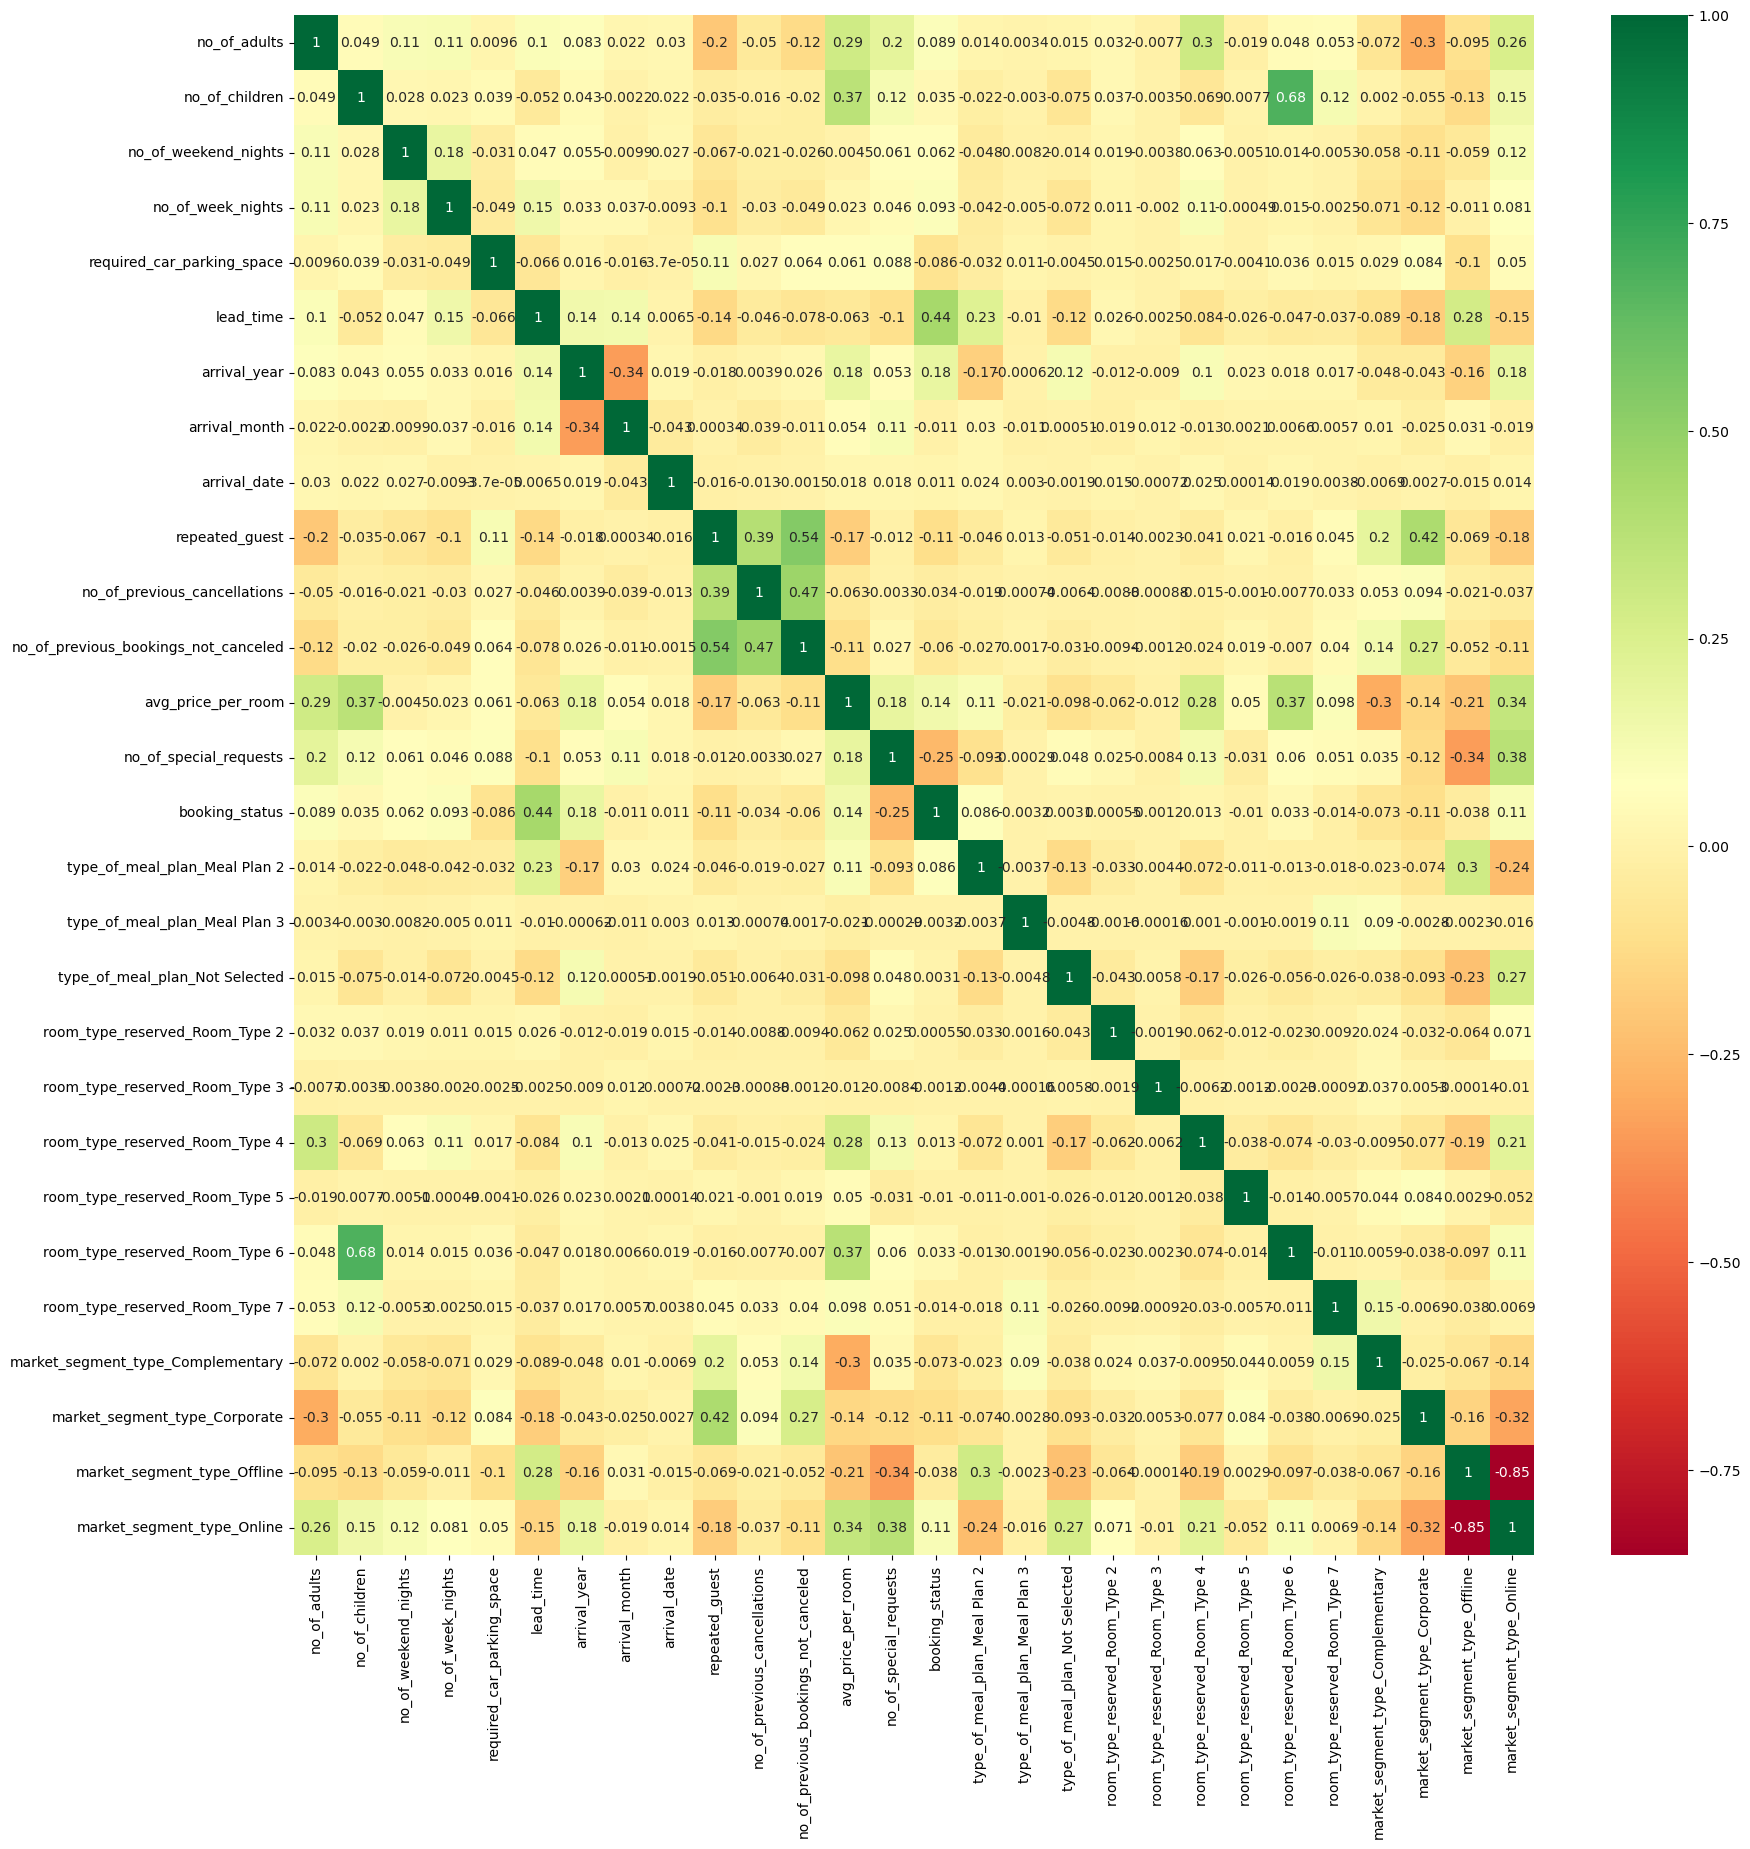

In [189]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [324]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):     #Threshold is the limit above which we want to check for correlation
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [327]:
corr_features = correlation(X_train, 0.3)

In [328]:
corr_features


{'arrival_month',
 'avg_price_per_room',
 'market_segment_type_Corporate',
 'market_segment_type_Offline',
 'market_segment_type_Online',
 'no_of_previous_bookings_not_canceled',
 'no_of_previous_cancellations',
 'room_type_reserved_Room_Type 4',
 'room_type_reserved_Room_Type 6'}

In [329]:
X_train.drop(corr_features,axis=1,inplace = True)      ##Removing correlated features from Xtrain and Xtest
X_test.drop(corr_features,axis=1,inplace=True)

In [330]:
RF=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,min_samples_leaf= 4,max_features= 'log2',max_depth= 8,criterion= 'gini')
RF.fit(best_features,y_train)
y_train_pred = RF.predict(best_features)
y_test_pred = RF.predict(test_best_features)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     17046
           1       0.85      0.74      0.79      8346

    accuracy                           0.87     25392
   macro avg       0.86      0.84      0.85     25392
weighted avg       0.87      0.87      0.87     25392

[[15927  1119]
 [ 2153  6193]]


In [331]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7344
           1       0.82      0.72      0.77      3539

    accuracy                           0.86     10883
   macro avg       0.85      0.82      0.83     10883
weighted avg       0.86      0.86      0.86     10883

[[6785  559]
 [ 975 2564]]


### In Filter method Correlation gave me the best accuracy - 86%

## 2. Wrapper Methods
The feature selection process is based on a specific machine learning algorithm we are trying to fit on a given dataset. It follows a greedy search approach by evaluating all the possible combinations of features against the evaluation criterion. The wrapper methods usually result in better predictive accuracy than filter methods.



This is an iterative method wherein we start with the performing features against the target features. Next, we select another variable that gives the best performance in combination with the first selected variable. This process continues until the preset criterion is achieved.

Only useful when data is small

There are 3 methods in Wrapper Methods:

1. Forward Selection: Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model.

2. Backward Elimination: In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features

### 3. RFE [Recursive Feature Elimination] is used for feature selection, It Eliminates the feature which having lowest coefficient 

#### Steps for using RFE:-
1. Fit model to dataset
2. Eliminate the feature with the smalest coefficient
3. repeate the procedure 1 and 2 until u find the best feature [this will be done by using cv]

 It is a greedy optimization algorithm which aims to find the best performing feature subset. It repeatedly creates models and keeps aside the best or the worst performing feature at each iteration. It constructs the next model with the left features until all the features are exhausted. It then ranks the features based on the order of their elimination.

In [307]:
from sklearn.feature_selection import RFE

In [308]:
rfe = RFE(estimator=RF, n_features_to_select=10, step=1)                # randomly selecting n_features_to_select=5 
rfe.fit(X_train, y_train)                                              # will consider optimal feature by doing cross validation

X_train_sub = rfe.transform(X_train)

Let's break down the code step by step:

rfe = RFE(estimator=RF, n_features_to_select=10, step=1): This line initializes the RFE object,specifying the estimator (RF, which is a RandomForest instance),the number of features to select (n_features_to_select=10), and the step size (step=1).
RFE is a feature selection technique that recursively eliminates features based on their importance,
and the specified parameters control the behavior of the feature selection process.

rfe.fit(X_train, y_train): This line fits the RFE object to the training data X_train and the corresponding target variable y_train. During the fitting process, RFE evaluates the importance of each feature by performing cross-validation and recursively eliminates the least important features until the desired number of features (n_features_to_select=10) is reached.

X_train_sub = rfe.transform(X_train): This line applies the feature selection determined by RFE to the training data X_train. It transforms X_train into a new dataset X_train_sub that contains only the selected features. The transformed dataset will have fewer columns (features) than the original X_train dataset, as the least important features have been eliminated.

In [309]:
rfe.support_           #The attribute rfe.support_ provides a boolean mask that indicates which features were selected or not by the Recursive Feature Elimination (RFE) algorithm.

array([ True, False, False,  True, False,  True,  True,  True,  True,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False,  True,  True])

In [310]:
X.columns[rfe.support_]  

Index(['no_of_adults', 'no_of_week_nights', 'lead_time', 'arrival_year',
       'arrival_month', 'arrival_date', 'avg_price_per_room',
       'no_of_special_requests', 'market_segment_type_Offline',
       'market_segment_type_Online'],
      dtype='object')

In [311]:
best_features = X_train[X.columns[rfe.support_]]

In [312]:
test_best_features = X_test[X.columns[rfe.support_]]

In [314]:
RF_model.fit(best_features,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [315]:
# best Parameter
RF_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [316]:
RF=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,min_samples_leaf= 4,max_features= 'log2',max_depth= 8,criterion= 'gini')
RF.fit(best_features,y_train)
y_train_pred = RF.predict(best_features)
y_test_pred = RF.predict(test_best_features)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91     17046
           1       0.85      0.74      0.79      8346

    accuracy                           0.87     25392
   macro avg       0.86      0.84      0.85     25392
weighted avg       0.87      0.87      0.87     25392

[[15941  1105]
 [ 2193  6153]]


In [317]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90      7344
           1       0.82      0.72      0.77      3539

    accuracy                           0.86     10883
   macro avg       0.85      0.82      0.83     10883
weighted avg       0.86      0.86      0.86     10883

[[6788  556]
 [ 990 2549]]


### RFE method is also giving me 86% accuracy

## 3. Embedded Methods
These methods encompass the benefits of both the wrapper and filter methods by including interactions of features

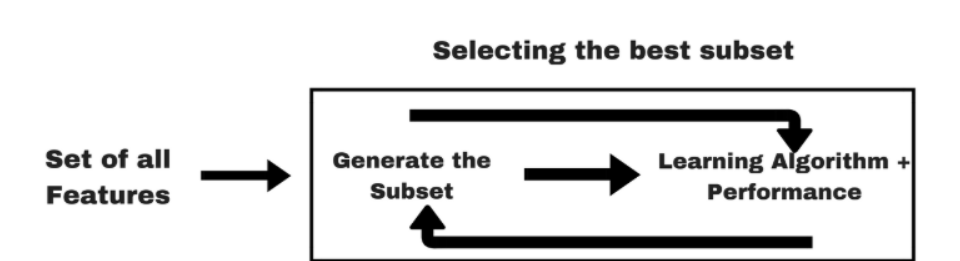

### a. LASSO Regularization (L1)

Regularization consists of adding a penalty to the different parameters of the machine learning model to reduce the freedom of the model, i.e., to avoid over-fitting.

In [319]:
from sklearn.linear_model import Lasso


# It creates an instance of the Lasso model with a specified regularization parameter alpha=0.1.
lasso = Lasso(alpha=0.1)

# Fit the model to the data
lasso.fit(X, y)

# Get the coefficients and corresponding feature names
coefficients = lasso.coef_
feature_names = X.columns

# Print the coefficients and selected features
print("Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef}")
    
# Print the selected features
selected_features = [feature for feature, coef in zip(feature_names, coefficients) if coef != 0]
print("\nSelected Features:")
for feature in selected_features:
    print(feature)

Coefficients:
no_of_adults: -0.0
no_of_children: -0.0
no_of_weekend_nights: 0.0
no_of_week_nights: 0.0
required_car_parking_space: -0.0
lead_time: 0.0024473111941762334
arrival_year: 0.0
arrival_month: -0.0018531376086082837
arrival_date: 0.0
repeated_guest: -0.0
no_of_previous_cancellations: -0.0
no_of_previous_bookings_not_canceled: -0.0
avg_price_per_room: 0.002209774304325726
no_of_special_requests: -0.0
type_of_meal_plan_Meal Plan 2: -0.0
type_of_meal_plan_Meal Plan 3: 0.0
type_of_meal_plan_Not Selected: 0.0
room_type_reserved_Room_Type 2: -0.0
room_type_reserved_Room_Type 3: 0.0
room_type_reserved_Room_Type 4: 0.0
room_type_reserved_Room_Type 5: -0.0
room_type_reserved_Room_Type 6: -0.0
room_type_reserved_Room_Type 7: -0.0
market_segment_type_Complementary: 0.0
market_segment_type_Corporate: -0.0
market_segment_type_Offline: -0.0
market_segment_type_Online: 0.0

Selected Features:
lead_time
arrival_month
avg_price_per_room


We print the coefficients and selected features. Coefficients with a value of zero indicate that the corresponding feature has been effectively eliminated from the model. We extract the selected features by filtering out the coefficients that are not zero.

The Lasso model includes a penalty term that promotes the selection of features by shrinking the coefficients towards zero. By setting some coefficients to zero, the Lasso effectively performs feature selection by excluding those features from the model. This property makes Lasso particularly useful when dealing with high-dimensional datasets, where only a subset of features may be relevant.

The loop 'for feature, coef in zip(feature_names, coefficients)' iterates over the feature names and their corresponding coefficients. The condition coef != 0 checks if the coefficient is non-zero. If the condition is true, the feature name is added to the selected_features list.

By printing only the features with non-zero coefficients, the code focuses on the subset of features that are considered important by the Lasso model. These non-zero coefficient features are believed to have a stronger influence on the target variable and are retained in the model.

The Lasso model's ability to set coefficients to zero allows for automatic feature selection and can be helpful in situations where there is a need to identify a sparse set of influential features.

In [320]:
X= data[selected_features]

In [321]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [322]:
RF=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,min_samples_leaf= 4,max_features= 'log2',max_depth= 8,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.98      0.87     17046
           1       0.90      0.44      0.60      8346

    accuracy                           0.80     25392
   macro avg       0.84      0.71      0.73     25392
weighted avg       0.82      0.80      0.78     25392

[[16640   406]
 [ 4637  3709]]


In [323]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.78      0.97      0.86      7344
           1       0.87      0.43      0.57      3539

    accuracy                           0.79     10883
   macro avg       0.82      0.70      0.72     10883
weighted avg       0.81      0.79      0.77     10883

[[7113  231]
 [2020 1519]]


### b. Random Forest Importance

The **feature_importances_** feature help identify which features are most important in the Random Forest model's decision-making process.

In the context of feature selection, feature importances can guide the selection of the most relevant features for a RandomForest model. By examining the feature importances, you can identify the features that contribute the most to the model's predictive power. This information can help you focus on the most informative features and potentially discard less important ones.

Feature Importances:
no_of_adults: 0.02306118958296136
no_of_children: 0.006827217442967621
no_of_weekend_nights: 0.03708636920623426
no_of_week_nights: 0.05269406225334603
required_car_parking_space: 0.006645449931429233
lead_time: 0.3199447317791196
arrival_year: 0.024352578968701893
arrival_month: 0.08094654554786027
arrival_date: 0.0933296916464747
repeated_guest: 0.0017046782373628816
no_of_previous_cancellations: 0.0003420260029891038
no_of_previous_bookings_not_canceled: 0.001647603033959984
avg_price_per_room: 0.15832375059376388
no_of_special_requests: 0.10701989788208813
type_of_meal_plan_Meal Plan 2: 0.011282129086438619
type_of_meal_plan_Meal Plan 3: 7.513935195639049e-05
type_of_meal_plan_Not Selected: 0.00903658946205855
room_type_reserved_Room_Type 2: 0.0029162483094480867
room_type_reserved_Room_Type 3: 2.295113698726957e-05
room_type_reserved_Room_Type 4: 0.008892813125264359
room_type_reserved_Room_Type 5: 0.0018816719550278558
room_type_reserved_Room_Type 6: 0.001756

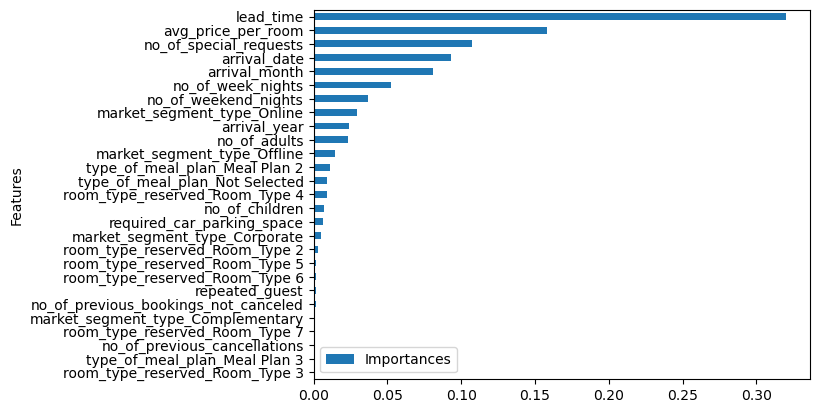

In [57]:
RF = RandomForestClassifier(random_state=42)

# Fit the model to the data
RF.fit(X, y)

# Get the feature importances
importances = RF.feature_importances_
feature_names = X.columns

# Print the feature importances
print("Feature Importances:")
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a dataframe for visualization
final_df = pd.DataFrame({'Features':feature_names,"Importances":importances})
final_df.set_index('Features',inplace=True)
sorted_importances = final_df.sort_values(by = 'Importances')
sorted_importances.plot(kind='barh')
plt.show()

In [58]:
X = data[final_df.nlargest(10,'Importances')['Importances'].index]

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state = 14)

In [60]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     17046
           1       1.00      0.99      0.99      8346

    accuracy                           0.99     25392
   macro avg       0.99      0.99      0.99     25392
weighted avg       0.99      0.99      0.99     25392

[[17006    40]
 [   98  8248]]


In [61]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.93      7344
           1       0.87      0.81      0.84      3539

    accuracy                           0.90     10883
   macro avg       0.89      0.88      0.88     10883
weighted avg       0.90      0.90      0.90     10883

[[6896  448]
 [ 667 2872]]


In [102]:
parameter={
 'criterion':['gini','entropy','log_loss'],
    'n_estimators':[100,200,300,400],
  'min_samples_split':[2,3,4,5,6],
   'min_samples_leaf':[2,3,4,5],
  'max_depth':[4,5,6,7,8],
  'max_features':['sqrt', 'log2']
    }

In [103]:
from sklearn.model_selection import RandomizedSearchCV

RF_model = RandomizedSearchCV(estimator = RF,param_distributions = parameter,cv=5,random_state = 0)

In [64]:
RF_model.fit(X_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [4, 5, 6, 7, 8],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [2, 3, 4, 5],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [100, 200, 300, 400]},
                   random_state=0)

In [65]:
RF_model.best_params_

{'n_estimators': 400,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'log2',
 'max_depth': 8,
 'criterion': 'gini'}

In [75]:
RF=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,min_samples_leaf= 4,max_features= 'log2',max_depth= 8,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.91     17046
           1       0.85      0.75      0.80      8346

    accuracy                           0.88     25392
   macro avg       0.87      0.85      0.86     25392
weighted avg       0.88      0.88      0.87     25392

[[15961  1085]
 [ 2051  6295]]


In [76]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90      7344
           1       0.83      0.74      0.78      3539

    accuracy                           0.87     10883
   macro avg       0.86      0.83      0.84     10883
weighted avg       0.86      0.87      0.86     10883

[[6812  532]
 [ 932 2607]]


### 4. Hybrid Method

 Dimensionality reduction techniques, such as Principal Component Analysis (PCA) and Singular Value Decomposition (SVD), transform the original features into a lower-dimensional space while preserving important information. These methods are effective for reducing the feature space but do not explicitly select individual features.

### a. PCA

Step 1: Scale the data using Standard or Min-Max Scaler

Step 2 : Fit the scaled data using PCA which we can import from sklearn.decomposition

Step 3: Plot the covariance matrix

Step 4: Create new subset with the selected features

Step 3 : Build the model

In [94]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc_x=sc.fit_transform(X)
scaled_x=pd.DataFrame(sc_x,columns=X.columns)
scaled_x.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,0.290916,-0.253655,0.217401,-0.144803,-0.178819,1.614896,-2.137469,0.839242,-1.555662,-0.16221,-0.063393,-0.087456,-1.095033,-0.78814,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,1.563833,-1.333174
1,0.290916,-0.253655,1.365993,0.563972,-0.178819,-0.933701,0.467843,1.164990,-1.098013,-0.16221,-0.063393,-0.087456,0.092806,0.48376,-0.316611,-0.011741,2.463970,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
2,-1.684559,-0.253655,1.365993,-0.853578,-0.178819,-0.980250,0.467843,-1.766747,1.419055,-0.16221,-0.063393,-0.087456,-1.237528,-0.78814,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
3,0.290916,-0.253655,-0.931190,-0.144803,-0.178819,1.463610,0.467843,-0.789501,0.503757,-0.16221,-0.063393,-0.087456,-0.097567,-0.78814,-0.316611,-0.011741,-0.405849,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090
4,0.290916,-0.253655,0.217401,-0.853578,-0.178819,-0.433291,0.467843,-1.115250,-0.525952,-0.16221,-0.063393,-0.087456,-0.254312,-0.78814,-0.316611,-0.011741,2.463970,-0.139454,-0.013893,-0.447709,-0.085785,-0.165404,-0.066141,-0.104385,-0.242645,-0.639454,0.750090


Now our dataframe is ready to perfrom the PCA operation

In [95]:
from sklearn.decomposition import PCA

In [96]:
pca = PCA(.95, random_state = 100)
pca_data = pca.fit_transform(scaled_x)

In [97]:
pd.Series(zip(list(pca.explained_variance_ratio_), list(np.cumsum(pca.explained_variance_ratio_))))

0     (0.11318160471153318, 0.11318160471153318)
1      (0.0888147097766297, 0.20199631448816288)
2      (0.06798375162176655, 0.2699800661099294)
3      (0.05532118001605677, 0.3253012461259862)
4     (0.050891072819334415, 0.3761923189453206)
5     (0.04706379339851775, 0.42325611234383836)
6     (0.04513060042893196, 0.46838671277277033)
7       (0.04200475837928665, 0.510391471152057)
8      (0.03894508038470894, 0.5493365515367659)
9      (0.03732480140896621, 0.5866613529457321)
10     (0.03711856663961652, 0.6237799195853486)
11     (0.03697782725686461, 0.6607577468422132)
12    (0.035826731535104614, 0.6965844783773179)
13     (0.03458015504952661, 0.7311646334268445)
14    (0.033128301242608175, 0.7642929346694526)
15    (0.032442735890795105, 0.7967356705602477)
16     (0.02996196985690881, 0.8266976404171565)
17    (0.028809896617852614, 0.8555075370350091)
18    (0.026674726561961543, 0.8821822635969707)
19    (0.024803463618471654, 0.9069857272154423)
20    (0.02150061586

In [98]:
df_bc_subset = pd.DataFrame(pca_data, columns= ['PC' + str(i+1) for i in range(23)])
df_bc_subset.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
0,2.241888,-1.908688,0.319275,0.206123,1.422622,0.166016,-0.826379,-0.255320,0.668917,-0.257106,-0.441516,1.108127,-0.114808,-0.100972,0.165834,0.304022,0.542365,-0.954178,-0.112718,-0.009885,1.062509,-0.192201,0.929451
1,-1.348082,0.542898,-1.441893,-0.732040,0.708265,0.505360,-1.407224,0.242708,1.446135,-0.324137,-0.107172,0.139874,0.362183,-0.151256,0.123918,0.916409,-0.161572,-0.372961,-0.455028,-0.964393,-1.138631,0.341265,-0.505335
2,0.351279,0.759120,-1.060793,-1.206964,-1.600634,0.663123,0.277115,-0.856299,-0.695144,0.981434,-0.385498,-1.384724,0.047086,-0.217549,0.135172,0.977372,-0.841301,0.180815,0.131164,1.604651,0.234814,-0.428326,0.159832
3,-0.243240,-0.339982,-0.422568,-0.003636,-1.010259,0.369702,0.112614,0.600213,-0.367359,-0.154703,0.295842,0.018963,0.024662,0.299575,-0.216643,-1.102173,0.160934,0.213139,-0.490161,0.713108,1.368963,-0.526721,0.022146
4,-0.621724,0.607529,-1.512393,-1.501238,-1.048389,0.539852,-0.217802,1.215192,0.605143,0.100260,-0.080807,0.058297,-0.249940,-0.008298,0.316580,0.897612,0.104299,-0.257331,-0.943626,-0.582973,0.041309,-0.039793,0.365971


In [99]:
# now will build the model based on this PCA data
# will seperate the data into independent and dependent features

X=df_bc_subset
y=y

In [100]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [88]:
RF=RandomForestClassifier(n_estimators= 400,min_samples_split= 2,min_samples_leaf= 4,max_features= 'log2',max_depth= 8,criterion= 'gini')
RF.fit(X_train,y_train)
y_train_pred = RF.predict(X_train)
y_test_pred = RF.predict(X_test)
print(classification_report(y_train,y_train_pred))
print(confusion_matrix(y_train,y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90     17114
           1       0.85      0.69      0.76      8278

    accuracy                           0.86     25392
   macro avg       0.86      0.81      0.83     25392
weighted avg       0.86      0.86      0.85     25392

[[16141   973]
 [ 2602  5676]]


In [89]:
print(classification_report(y_test,y_test_pred))
print(confusion_matrix(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89      7276
           1       0.85      0.66      0.74      3607

    accuracy                           0.85     10883
   macro avg       0.85      0.80      0.82     10883
weighted avg       0.85      0.85      0.84     10883

[[6850  426]
 [1244 2363]]


### PCA method is giving me the same 85% accuracy itself

### So the best accuracy I got after feature selection, hypertuning and model building is 87%. The model which gave most accurate result was random forest and the feature selection used was Random Forest Importance.

### Before feauture selection my model accuracy was 85%. But now it got increased to 87%